In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
# from datasets.mnist import DataModule, DataModuleConfig
import seaborn as sns
import pandas as pd 

NOISE_TYPE = "ambient"
DATASET_NAME = "mnist"
ECT_PLOT_CONFIG = {"cmap":"bone","vmin":-0.5,"vmax":1.5}
PC_PLOT_CONFIG = {"s":10,"c":'.5'}


sns.set_theme(font="Times New Roman",palette="pastel")


# Make plot for MNIST loss per noise level.

In [2]:
df_gaussian = pd.read_csv(f"./results/noise_gaussian.csv")
df_ambient = pd.read_csv(f"./results/noise_ambient.csv")
df_blur = pd.read_csv(f"./results/noise_blur.csv")

In [3]:
df_ambient["noise_type"] = "Ambient"
df_blur["noise_type"] = "Blur"
df_gaussian["noise_type"] = "gaussian"

df = pd.concat([df_ambient.iloc[:10],df_blur.iloc[:10], df_gaussian.iloc[:10]])

# 
df = df[["mean","noise_type","Index"]].reset_index()
df["mean"] = df["mean"] * 1e2

df = df.rename(columns={"mean":"CD","Index":"Noise"})

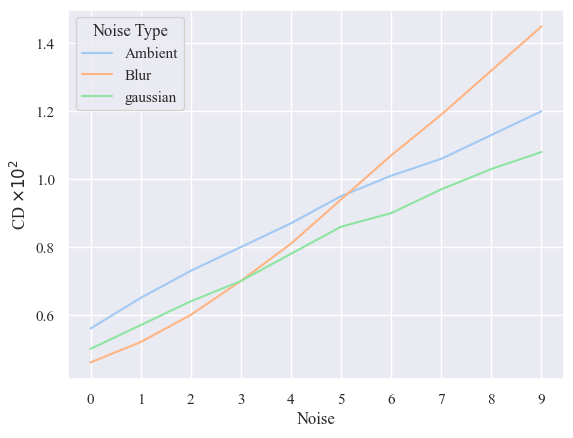

In [4]:
g = sns.lineplot(df,x="Noise",y="CD",hue="noise_type")
g.set(ylabel=r'CD $\times 10^2$' )
g.legend(title='Noise Type')


# Make  plot with three rows

10
10
10


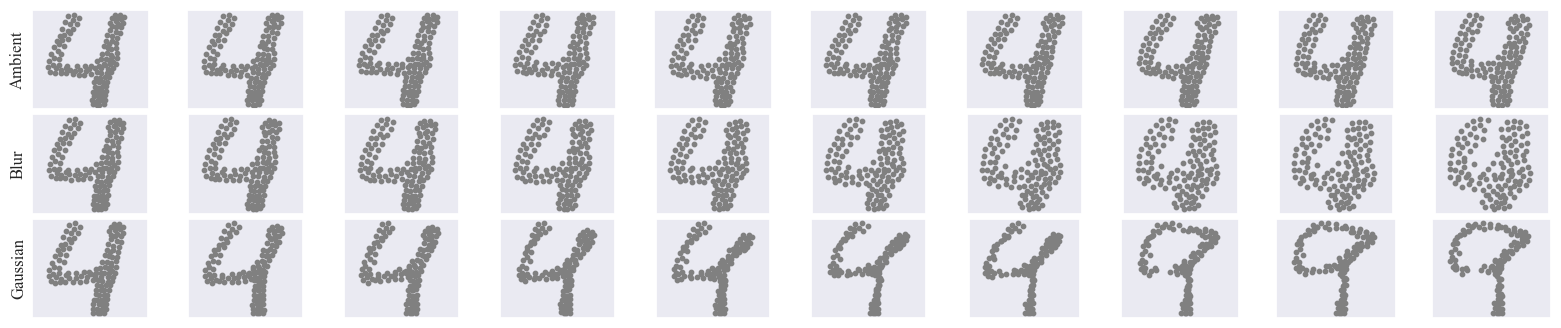

In [5]:
NOISE_TYPE = "blur"
DATASET_NAME = "mnist"
i = 4

vis_x_blur = torch.load(f"./results/noise_blur_vis_x.pt")
vis_x_gaussian = torch.load(f"./results/noise_gaussian_vis_x.pt")
vis_x_ambient = torch.load(f"./results/noise_ambient_vis_x.pt")

def rotate(p, origin=(0, 0), degrees=0):
    angle = np.deg2rad(degrees)
    R = np.array([[np.cos(angle), -np.sin(angle)],
                  [np.sin(angle),  np.cos(angle)]])
    o = np.atleast_2d(origin)
    p = np.atleast_2d(p)
    return np.squeeze((R @ (p.T-o.T) + o.T).T)

fig,axes=plt.subplots(3,10, figsize=(20,4))
fig.subplots_adjust(wspace=0.05,hspace=0.05)
# fig.tight_layout()
counter = 0
noise_type = ["Ambient", "Blur","Gaussian"]
for point_clouds,axis in zip([vis_x_ambient[i],vis_x_blur[i],vis_x_gaussian[i]],axes):
    print(len(point_clouds))
    for idx, pc in enumerate(point_clouds):
        x = pc.view(128,2).cpu().numpy()
        x = rotate(x, degrees=-90)
        ax = axis[idx]
        ax.scatter(x[:,0],x[:,1],**PC_PLOT_CONFIG)
        ax.set_xlim([-1.1,1.1])
        ax.set_xlim([-1.1,1.1])
        # ax.axis("off")
        ax.set_xticks([])
        ax.set_yticks([])
        # ax.show_xticks(False)
        ax.set_aspect(1)
        if idx == 0:
            ax.set_ylabel(noise_type[counter])
    counter +=1

# plt.savefig(f"./figures/img/mnist/stability_{NOISE_TYPE}_{i}",
#             bbox_inches='tight', 
#             transparent=True,
#             pad_inches=0)


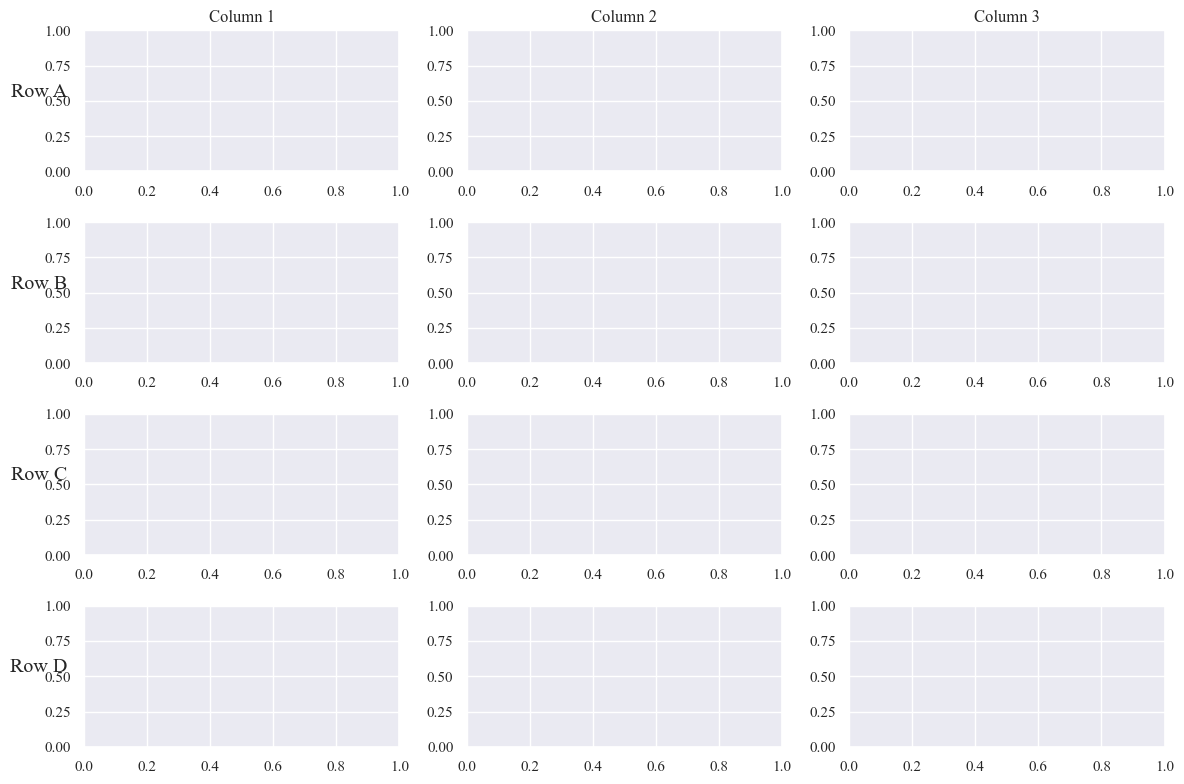

In [6]:
import matplotlib.pyplot as plt

cols = ['Column {}'.format(col) for col in range(1, 4)]
rows = ['Row {}'.format(row) for row in ['A', 'B', 'C', 'D']]

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 8))

for ax, col in zip(axes[0], cols):
    ax.set_title(col)

for ax, row in zip(axes[:,0], rows):
    ax.set_ylabel(row, rotation=0, size='large')

fig.tight_layout()
plt.show()

In [7]:

def rotate(p, origin=(0, 0), degrees=0):
    angle = np.deg2rad(degrees)
    R = np.array([[np.cos(angle), -np.sin(angle)],
                  [np.sin(angle),  np.cos(angle)]])
    o = np.atleast_2d(origin)
    p = np.atleast_2d(p)
    return np.squeeze((R @ (p.T-o.T) + o.T).T)


for i in vis_ect.keys():
    fig,axes=plt.subplots(3,10, figsize=(20,6))
    fig.subplots_adjust(wspace=0.05,hspace=0.05)

    for ect,x,x_orig,axis in zip(vis_ect[i],vis_x[i],vis_x_original[i],axes.T):
        x = x.view(128,2).cpu().numpy()
        x = rotate(x, degrees=-90)

        x_orig = x_orig.cpu().numpy()
        x_orig = rotate(x_orig, degrees=-90)

        ax = axis[0]
        ax.scatter(x[:,0],x[:,1],**PC_PLOT_CONFIG)
        ax.set_xlim([-1.1,1.1])
        ax.set_xlim([-1.1,1.1])
        ax.axis("off")
        ax.set_aspect(1)


        ax = axis[1]
        ax.scatter(x_orig[:,0],x_orig[:,1],**PC_PLOT_CONFIG)
        ax.set_xlim([-1.1,1.1])
        ax.set_xlim([-1.1,1.1])
        ax.axis("off")
        ax.set_aspect(1)
        
        ax = axis[2]
        ax.imshow(ect.cpu().squeeze().numpy(),**ECT_PLOT_CONFIG)
        ax.axis("off")
        
    plt.savefig(f"./figures/img/mnist/stability_{NOISE_TYPE}_{i}",
                bbox_inches='tight', 
                transparent=True,
                pad_inches=0)

NameError: name 'vis_ect' is not defined

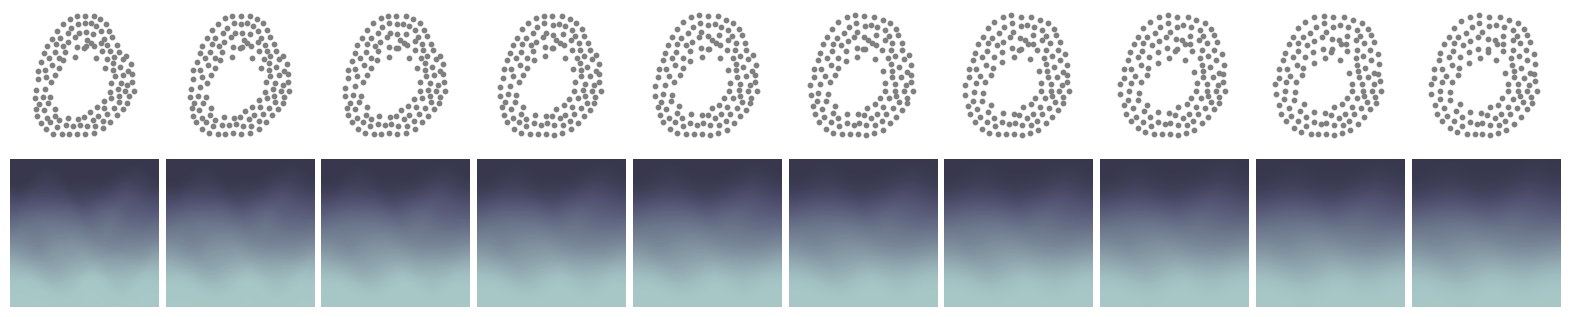

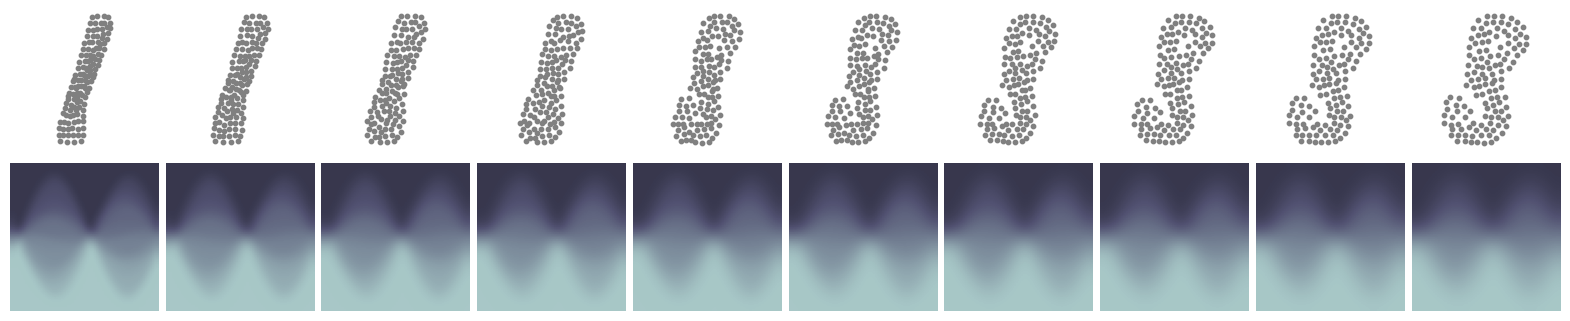

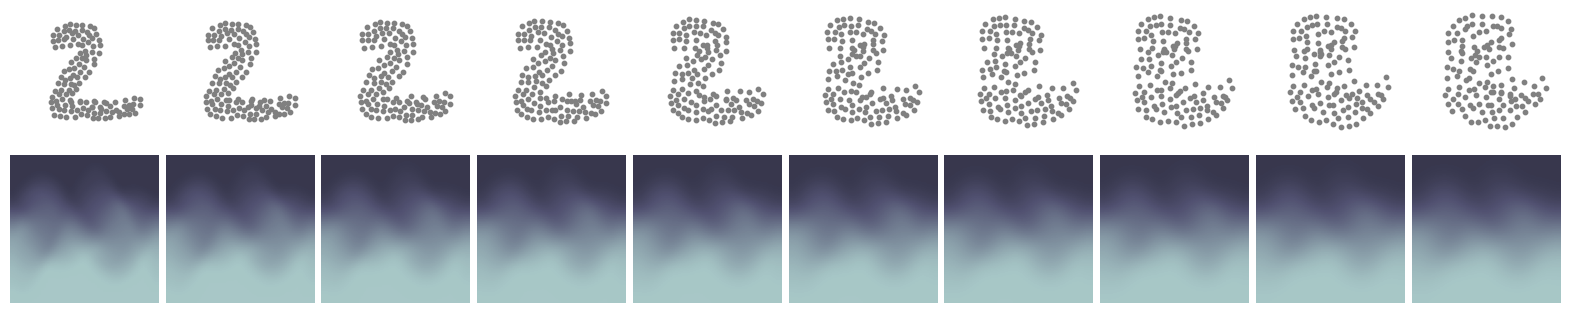

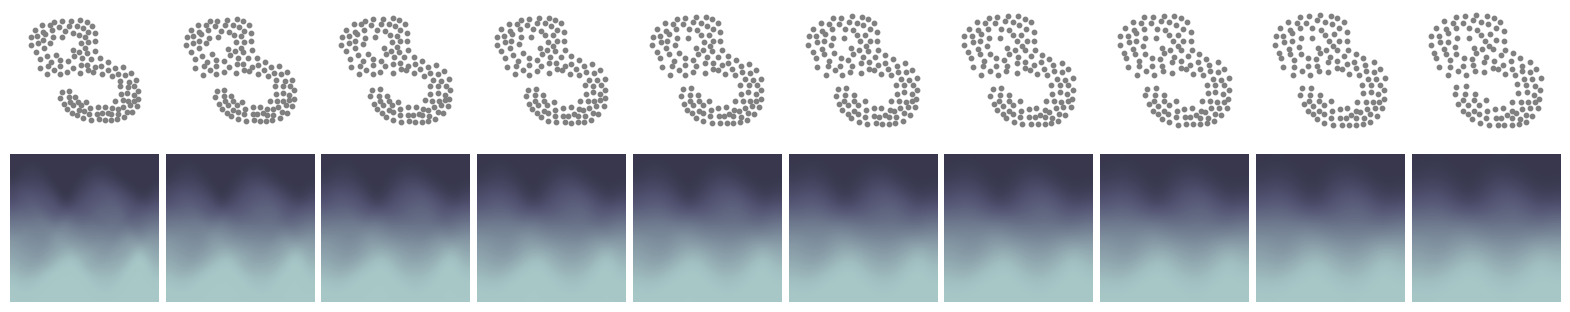

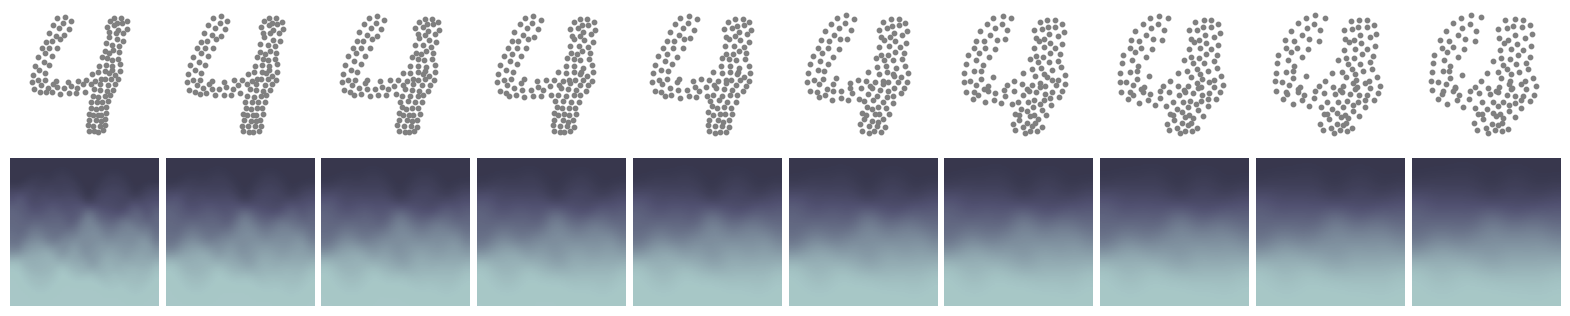

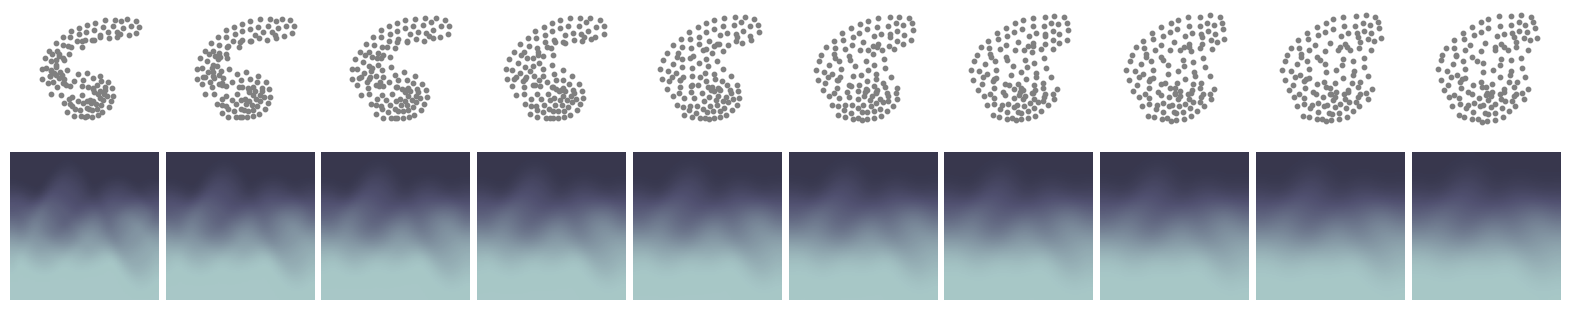

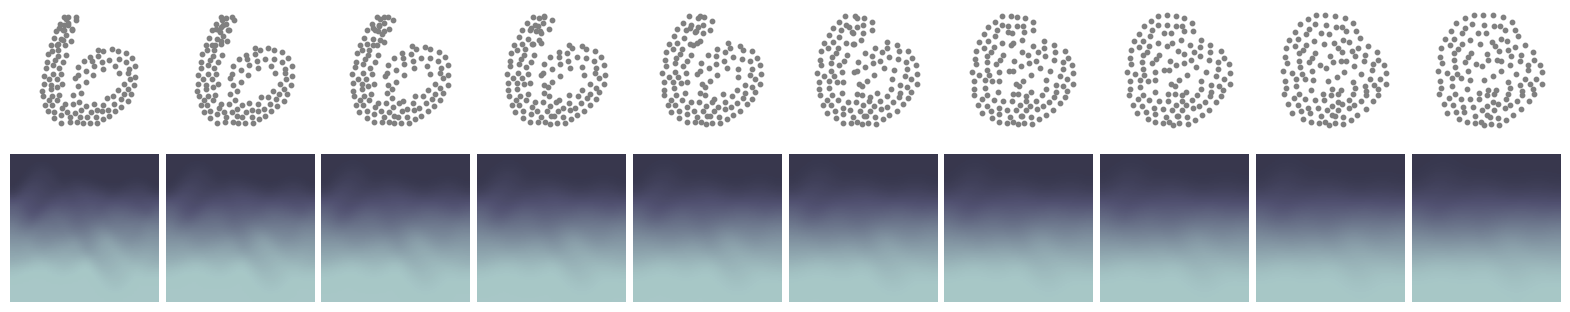

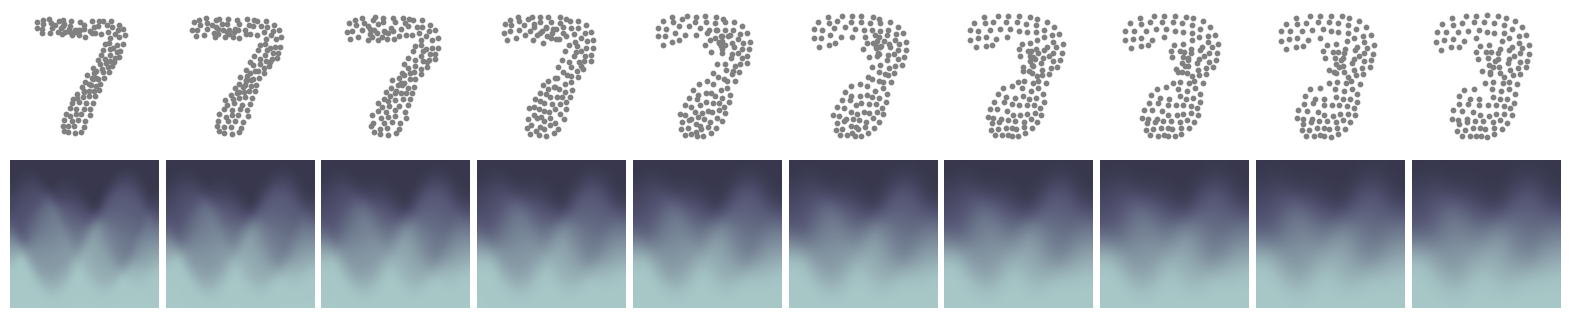

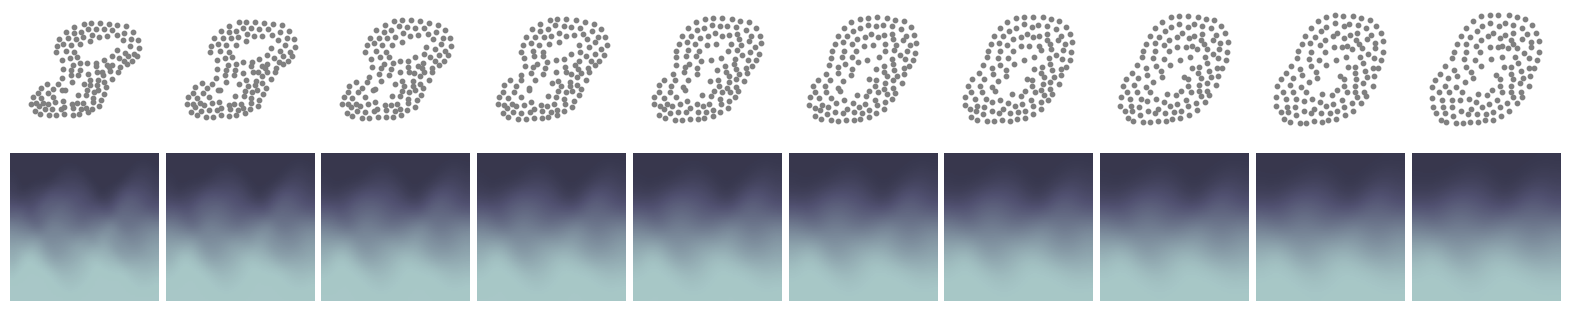

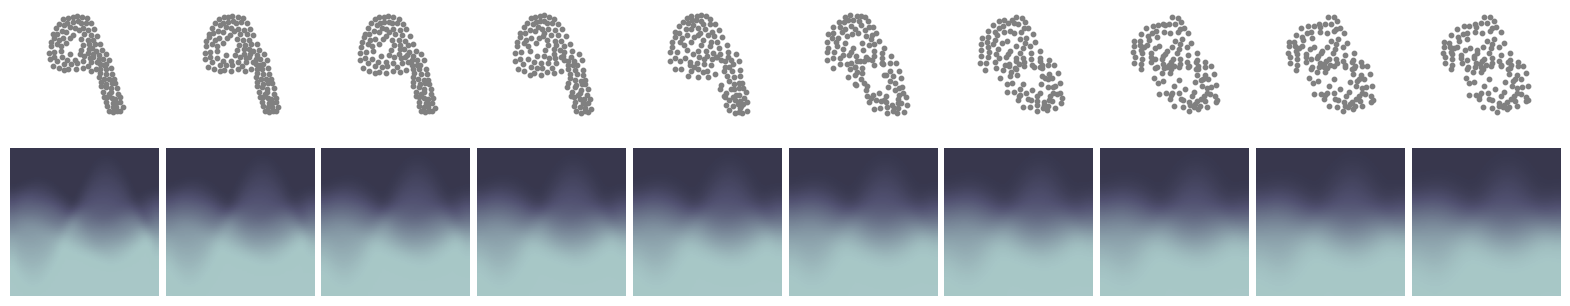

In [69]:
NOISE_TYPE = "blur"
DATASET_NAME = "mnist"
vis_ect = torch.load(f"./results/noise_{NOISE_TYPE}_vis_ect.pt")
vis_x = torch.load(f"./results/noise_{NOISE_TYPE}_vis_x.pt")

def rotate(p, origin=(0, 0), degrees=0):
    angle = np.deg2rad(degrees)
    R = np.array([[np.cos(angle), -np.sin(angle)],
                  [np.sin(angle),  np.cos(angle)]])
    o = np.atleast_2d(origin)
    p = np.atleast_2d(p)
    return np.squeeze((R @ (p.T-o.T) + o.T).T)


for i in vis_ect.keys():
    fig,axes=plt.subplots(2,10, figsize=(20,4))
    fig.subplots_adjust(wspace=0.05,hspace=0.05)

    for ect,x,axis in zip(vis_ect[i],vis_x[i],axes.T):
        x = x.view(128,2).cpu().numpy()
        x = rotate(x, degrees=-90)
        ax = axis[0]
        ax.scatter(x[:,0],x[:,1],**PC_PLOT_CONFIG)
        ax.set_xlim([-1.1,1.1])
        ax.set_xlim([-1.1,1.1])
        ax.axis("off")
        ax.set_aspect(1)
        
        ax = axis[1]
        ax.imshow(ect.squeeze().cpu().numpy(),**ECT_PLOT_CONFIG)
        ax.axis("off")
        
    plt.savefig(f"./figures/img/mnist/stability_{NOISE_TYPE}_{i}",
                bbox_inches='tight', 
                transparent=True,
                pad_inches=0)

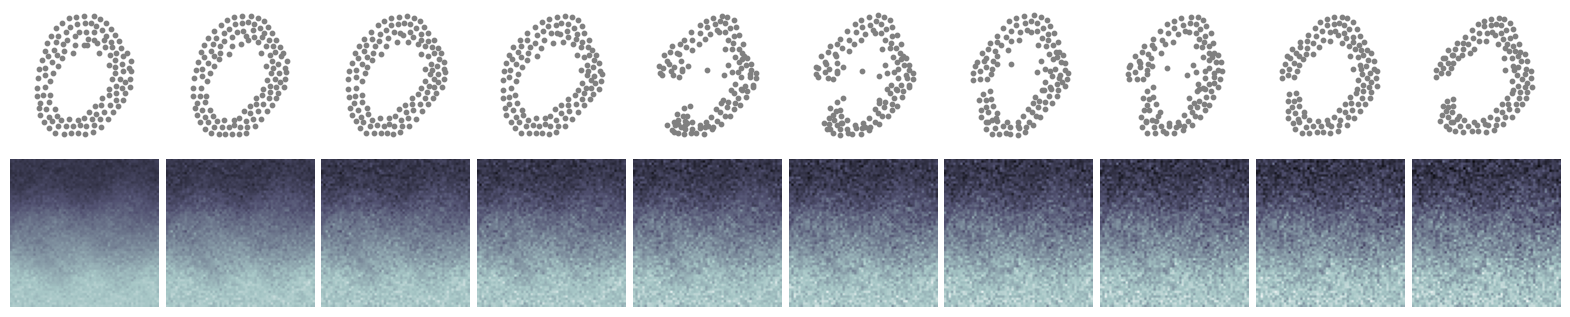

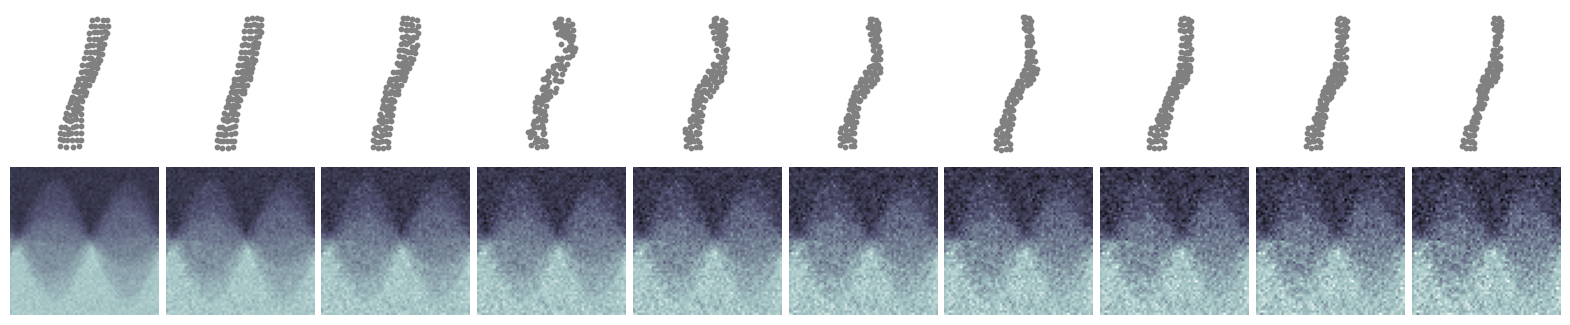

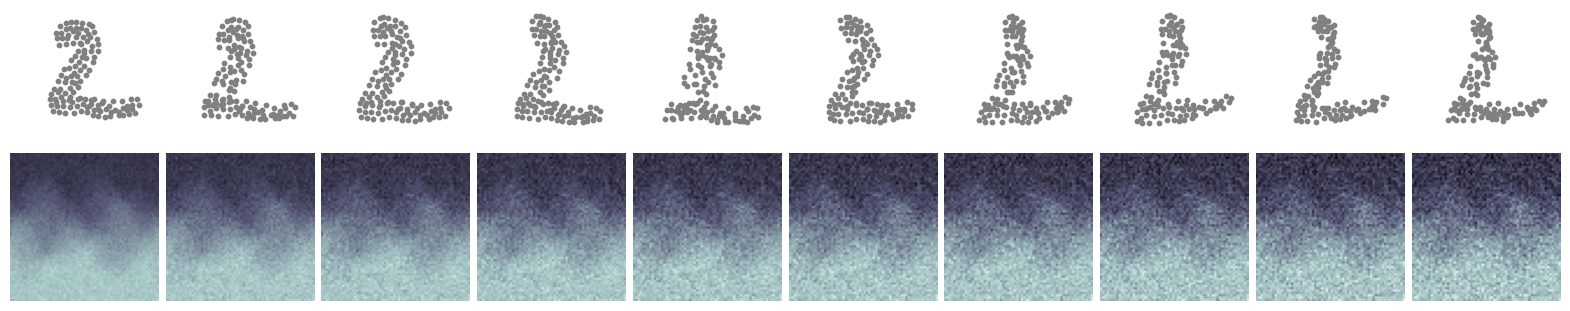

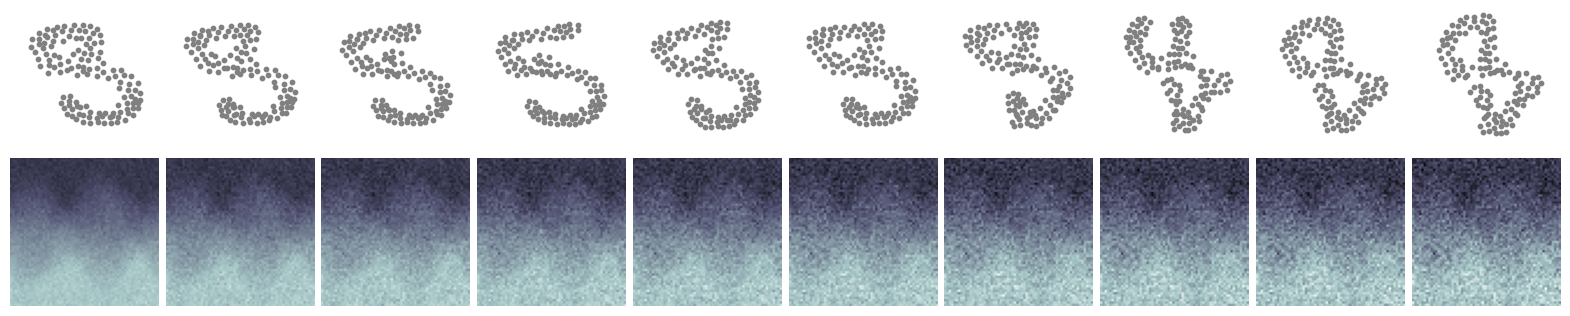

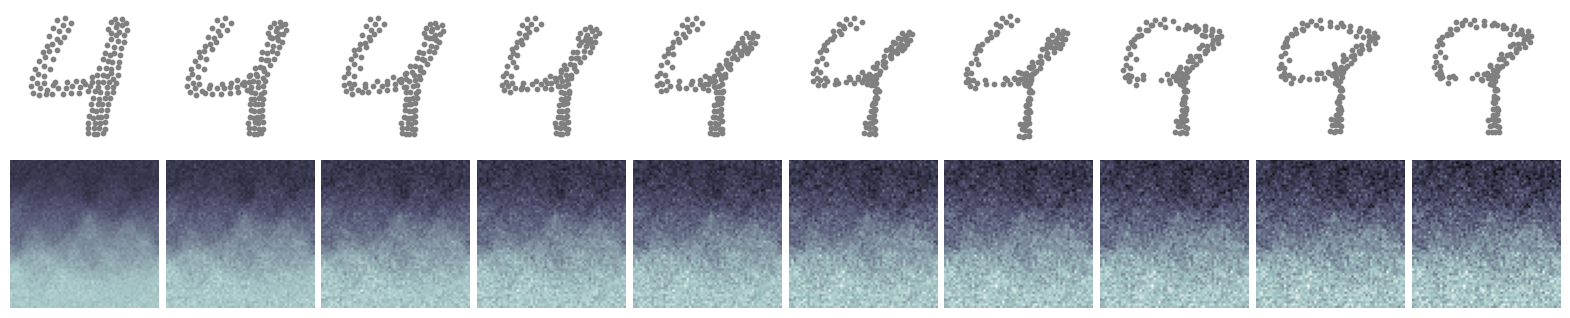

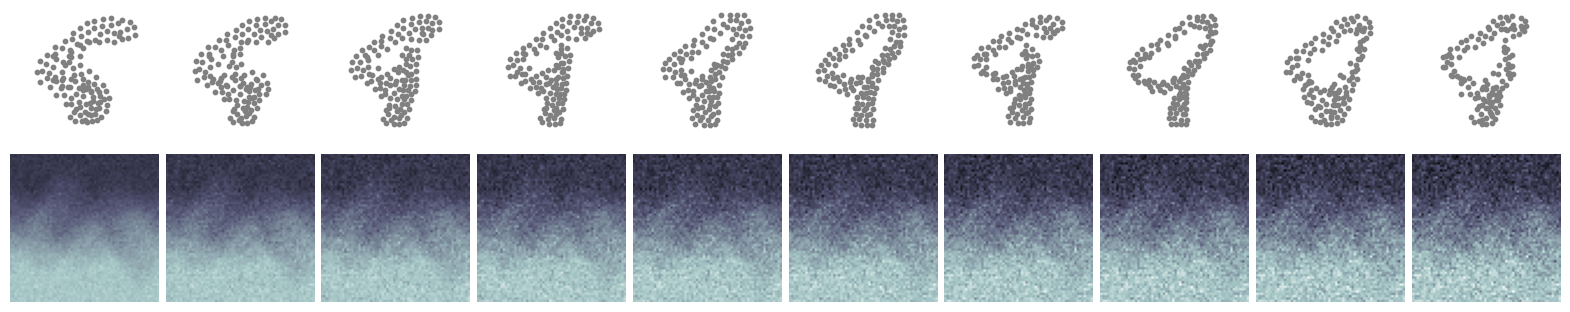

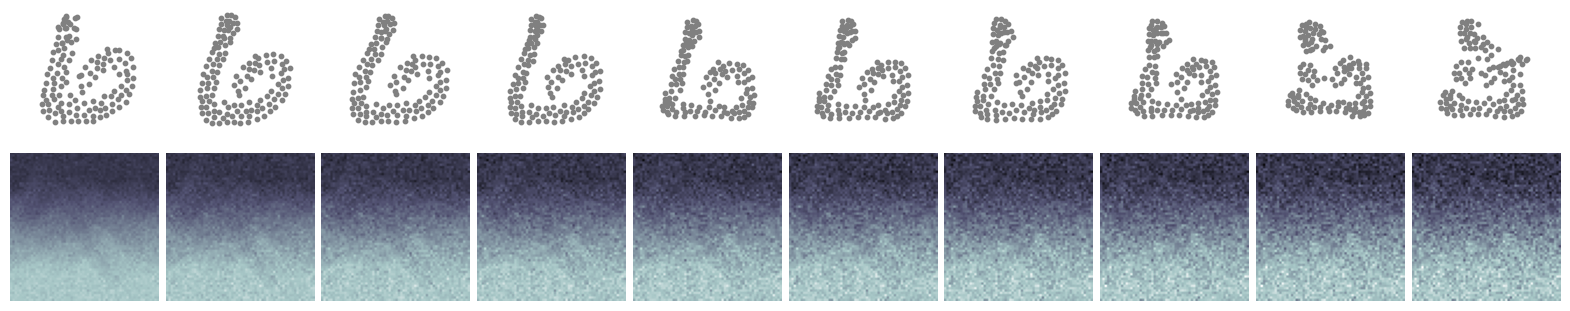

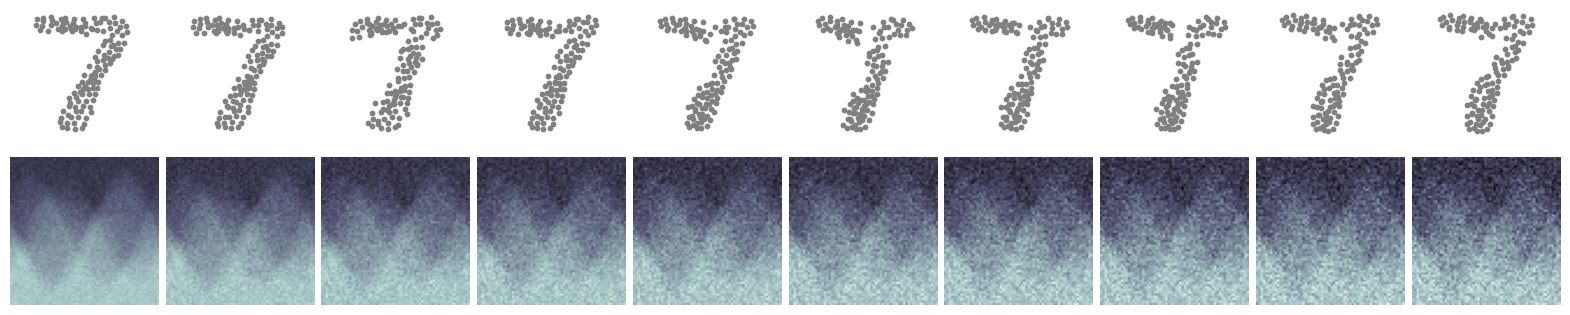

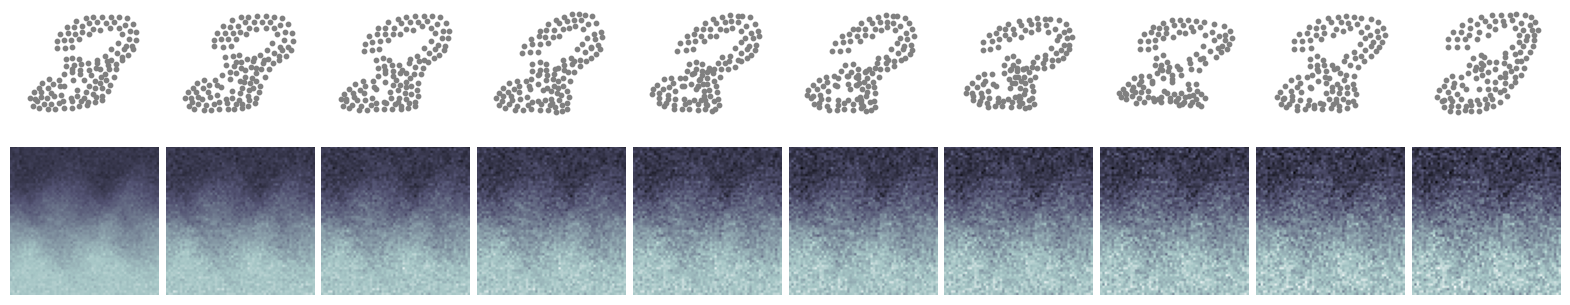

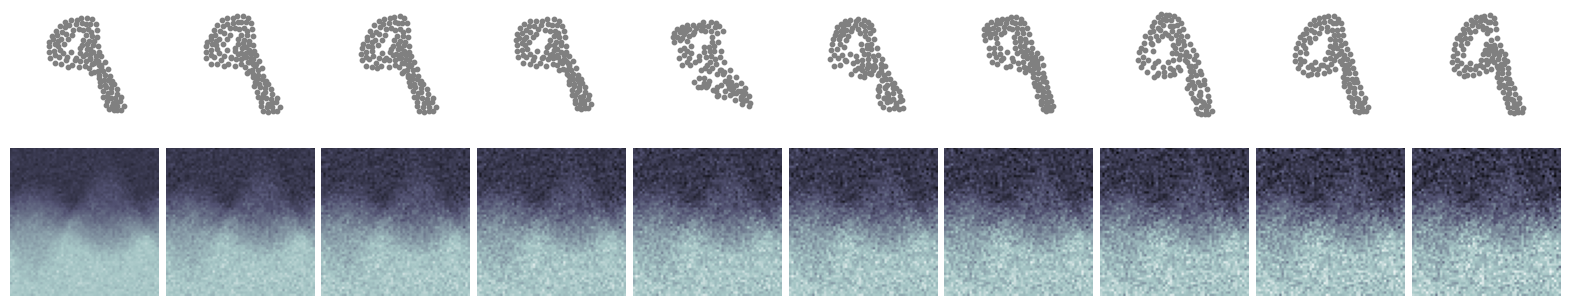

In [70]:
NOISE_TYPE = "gaussian"
DATASET_NAME = "mnist"
vis_ect = torch.load(f"./results/noise_{NOISE_TYPE}_vis_ect.pt")
vis_x = torch.load(f"./results/noise_{NOISE_TYPE}_vis_x.pt")

for i in vis_ect.keys():
    fig,axes=plt.subplots(2,10, figsize=(20,4))
    fig.subplots_adjust(wspace=0.05,hspace=0.05)

    for ect,x,axis in zip(vis_ect[i],vis_x[i],axes.T):
        x = x.view(128,2).cpu().numpy()
        x = rotate(x, degrees=-90)
        ax = axis[0]
        ax.scatter(x[:,0],x[:,1],**PC_PLOT_CONFIG)
        ax.set_xlim([-1.1,1.1])
        ax.set_xlim([-1.1,1.1])
        ax.axis("off")
        ax.set_aspect(1)
        
        ax = axis[1]
        ax.imshow(ect.squeeze().cpu().numpy(),**ECT_PLOT_CONFIG)
        ax.axis("off")
        
    plt.savefig(f"./figures/img/mnist/stability_{NOISE_TYPE}_{i}",
                bbox_inches='tight', 
                transparent=True,
                pad_inches=0)